# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
lyric_df = pd.read_csv('../data/lyrics_clean.csv', index_col = 0)

Dropping the 1940's, 1950's and 2010's from the data due to low volume.

In [3]:
# filtering lyrics to only include the decades that will be included in the analysis
lyric_df = lyric_df[(lyric_df['decade'] != 1940) & (lyric_df['decade'] != 1950) & (lyric_df['decade'] != 2010)]

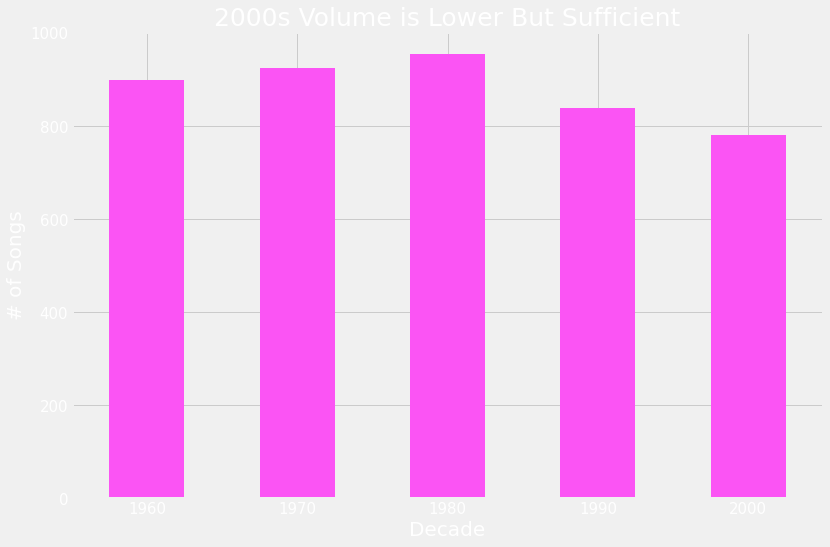

In [28]:
# checking the volume for each remaining decade
lyric_df.groupby('decade')['decade'].count().plot(kind = 'bar', figsize = (12,8), color = '#fb54f4')
plt.title('2000s Volume is Lower But Sufficient', size = 25, color = 'white')
plt.ylabel('# of Songs', size = 20, color = 'white')
plt.xlabel('Decade', size = 20, color = 'white')
plt.yticks(size = 15, color = 'white')
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.savefig('../assets/song_count.png', transparent=True);

## Average Word & Character Count Per Decade

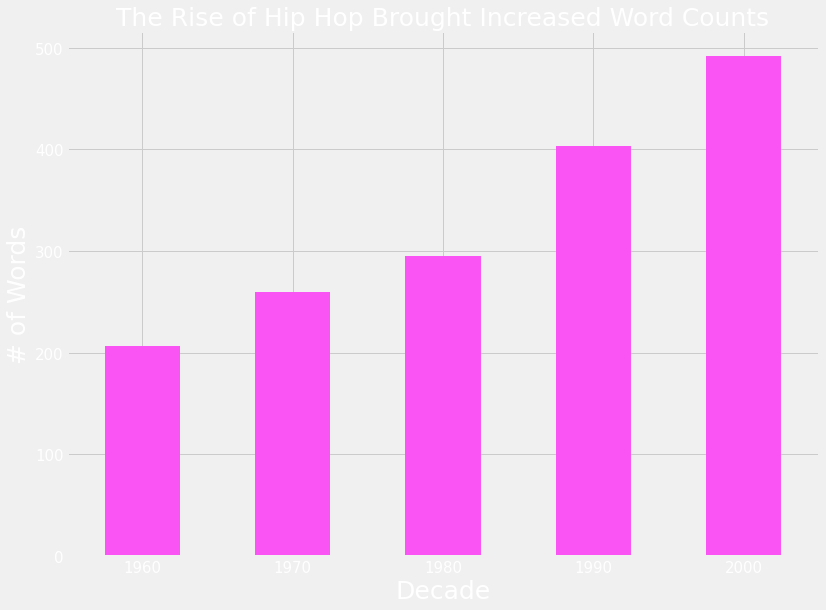

In [24]:
lyric_df.groupby('decade')['word_count'].mean().plot(kind = 'bar', figsize = (12,9), color = '#fb54f4')
plt.title('The Rise of Hip Hop Brought Increased Word Counts', size = 25, color = 'white')
plt.ylabel('# of Words', size = 25, color = 'white')
plt.xlabel('Decade', size = 25, color = 'white')
plt.yticks(size = 15, color = 'white')
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.savefig('../assets/word_count.png', transparent=True);

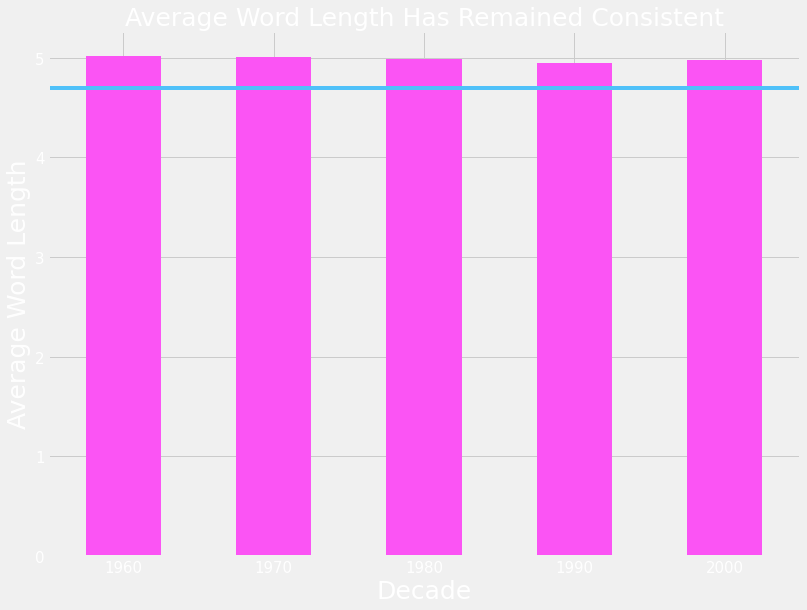

In [25]:
lyric_df.groupby('decade')['word_length'].mean().plot(kind = 'bar', figsize = (12,9), color = '#fb54f4')
plt.title('Average Word Length Has Remained Consistent', size = 25, color = 'white')
plt.ylabel('Average Word Length', size = 25, color = 'white')
plt.xlabel('Decade', size = 25, color = 'white')
plt.yticks(size = 15, color = 'white')
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.axhline(y=4.7, color='#4fc1f9', linestyle='-', label = 'Average Length of English Words'), 
plt.legend([],[], frameon = False)
# plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, labels = ['English Average', 'Word Length'])
plt.savefig('../assets/word_length.png', transparent=True);

# Sentiment Analysis

In [8]:
def sentiment_score(lyrics):
 
    # Create a SentimentIntensityAnalyzer object.
    sia_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sia_obj.polarity_scores(lyrics)
 
    return sentiment_dict['compound']

In [9]:
lyric_df['lyric_valence'] = lyric_df['clean_lyrics'].map(sentiment_score)

In [10]:
# categorizing songs as positive, nuetral or negative based on overall valence score
lyric_df['is_positive'] = np.where(lyric_df['lyric_valence'] >= .5, 1, 0)
lyric_df['is_negative'] = np.where(lyric_df['lyric_valence'] < -.5 , 1, 0)
lyric_df['is_neutral'] = np.where((lyric_df['lyric_valence'] >= -.5) & (lyric_df['lyric_valence'] <=.5), 1, 0)

In [29]:
# saving DF to CSV now that feature engineering is complete
lyric_df.to_csv('../data/lyrics_final.csv')

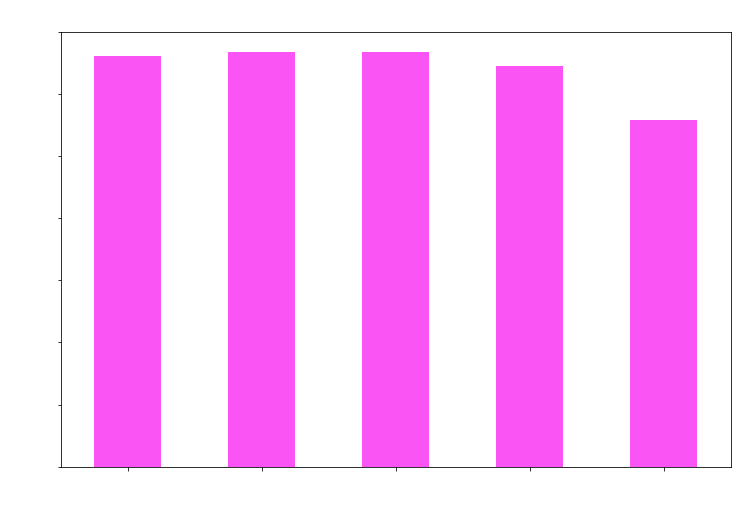

In [12]:
lyric_df.groupby('decade')['lyric_valence'].mean().plot(kind = 'bar', figsize = (12,8), color = '#fb54f4')
plt.title('Average Sentiment Takes a Drop in the 2000s', size = 25, color = 'white')
plt.ylabel('Average Sentiment Score', size = 20, color = 'white')
plt.xlabel('Decade', size = 20, color = 'white')
plt.yticks(size = 15, color = 'white')
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.savefig('../assets/song_count.png', transparent=True);

In [13]:
valence_plot = lyric_df.groupby('year')[['lyric_valence', 'decade']].mean().reset_index()

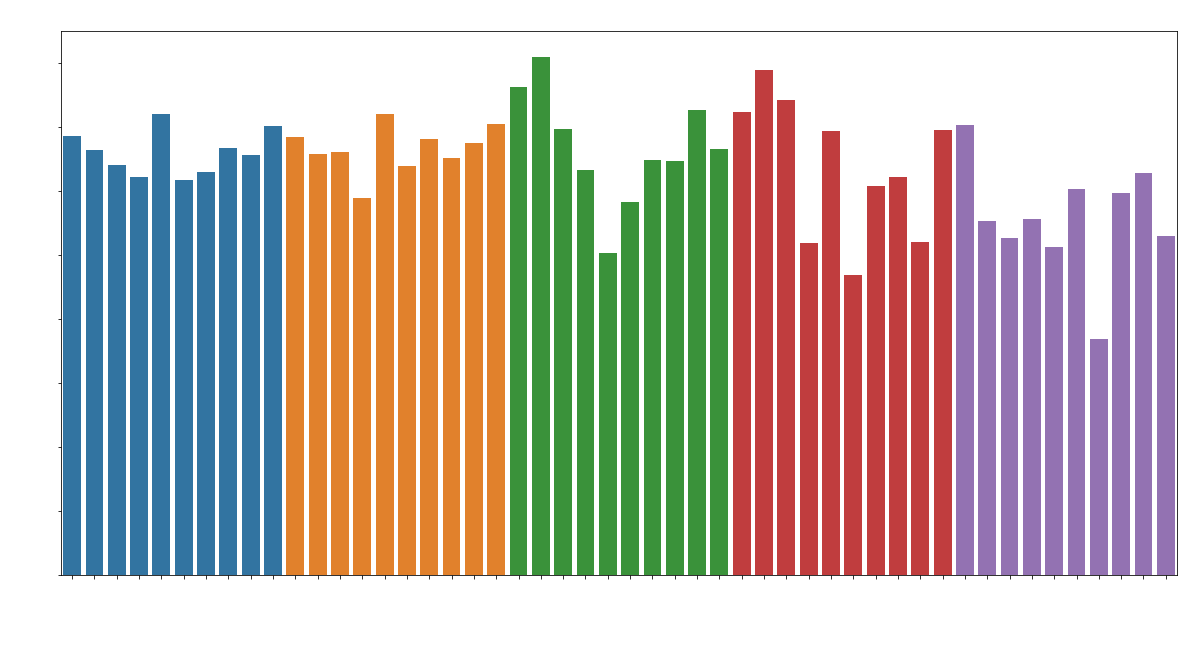

In [15]:
plt.figure(figsize = (20, 10))
plt.title('Hope Sprints Eternal At the Turn of a New Decade', size = 25, color = 'white')
plt.xticks(rotation = 50, size = 15, color = 'white')
plt.yticks(size = 15, color = 'white')
sns.barplot(data = valence_plot, x = 'year', y = 'lyric_valence', hue = 'decade', dodge = False)
plt.xlabel('Year', size = 20, color = 'white')
plt.ylabel('Average Sentiment', size = 20, color = 'white')
plt.legend([], [], frameon = False)
plt.savefig('../assets/yearly_valence.png', transparent=True);

In [16]:
sentiment = lyric_df[['decade', 'is_negative', 'is_neutral', 'is_positive']].groupby('decade').mean().reset_index()
sentiment.rename(columns = {'decade': 'Decade', 'is_negative': 'Negative', 'is_positive': 'Positive', 'is_neutral': 'Neutral'}, inplace = True)

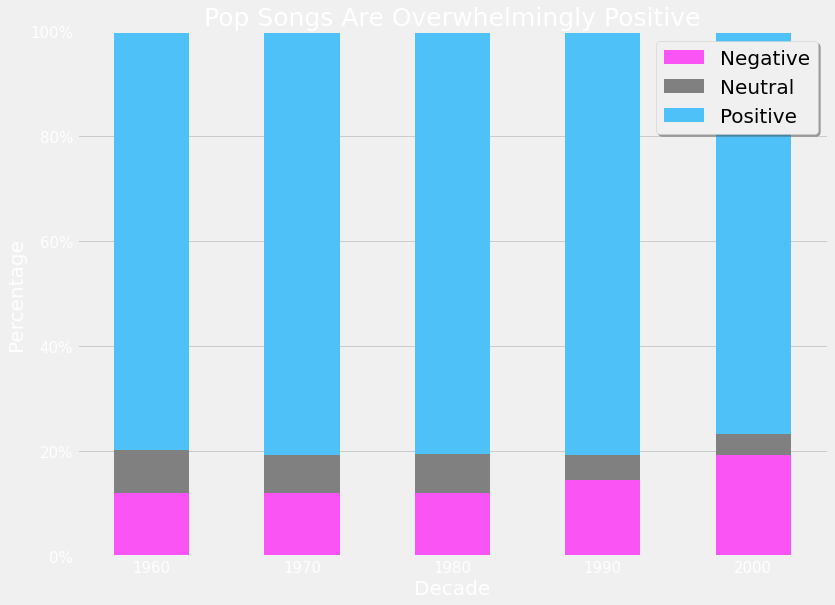

In [26]:
sentiment.set_index('Decade').plot(kind='bar', stacked=True, color=['#fb54f4', 'gray','#4fc1f9'], figsize = (12,9))
plt.style.use('fivethirtyeight')
plt.xlabel('Decade', size = 20, color = 'white')
plt.ylabel('Percentage', size = 20, color = 'white')
plt.ylim(top = .8)
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.yticks(ticks = [0, .2, .4, .6, .8, 1], labels = ['0%', '20%', '40%', '60%', '80%', '100%'], size = 15, color = 'white')
plt.legend(fontsize = 20, framealpha = 1, shadow = True)
plt.title('Pop Songs Are Overwhelmingly Positive', fontsize = 25, color = 'white')
plt.savefig('../assets/percent_valence.png', transparent=True);

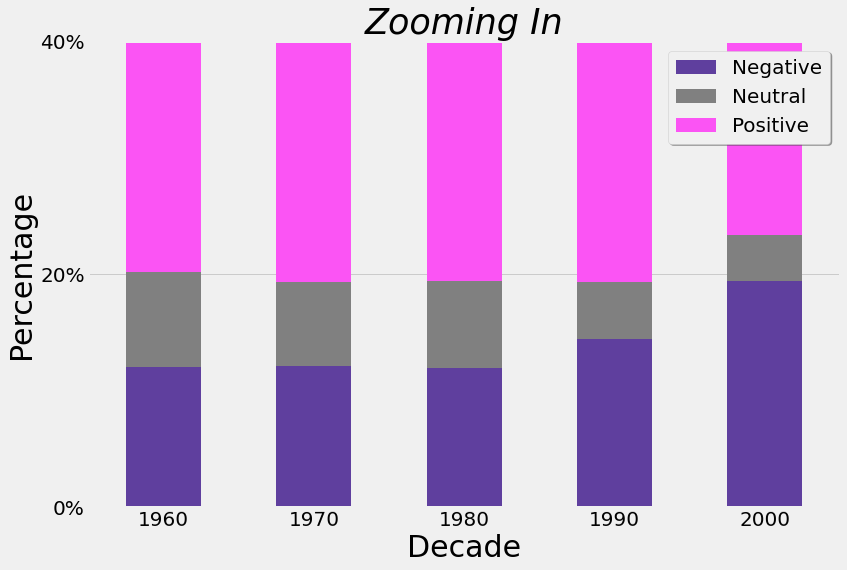

In [ ]:
sentiment.set_index('Decade').plot(kind='bar', stacked=True, color=['#5f3f9e', 'gray', '#fb54f4'], figsize = (12,8))
plt.xlabel('Decade', size = 30)
plt.ylabel('Percentage', size = 30)
plt.ylim(top = .4)
plt.xticks(rotation = .25, size = 20)
plt.yticks(ticks = [0, .2, .4], labels = ['0%', '20%', '40%'], size = 20)
plt.legend(fontsize = 20, framealpha = 1, shadow = True)
plt.title('Zooming In', fontsize = 35, fontstyle = 'italic')
plt.show();

## Profane / Suggestive Analysis

An analysis of how many songs are considered profane or suggestive. Songs fall into this category if they contain words that are profanity, slurs or sexually suggestive. A full list of the 835 words checked for this status can be found here: https://github.com/snguyenthanh/better_profanity/blob/master/better_profanity/profanity_wordlist.txt

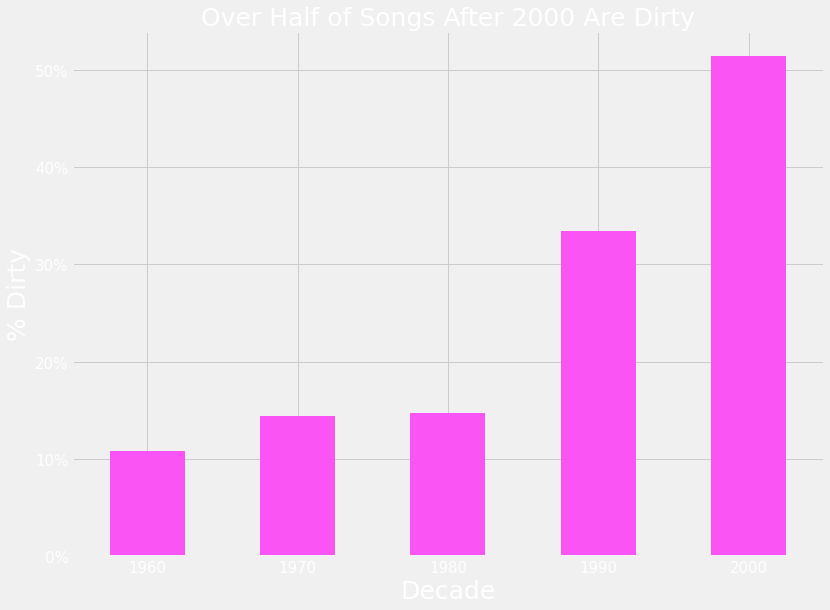

In [19]:
lyric_df.groupby('decade')['suggestive'].mean().plot(kind = 'bar', figsize = (12,9), color = '#fb54f4')
plt.title('Over Half of Songs After 2000 Are Dirty', size = 25, color = 'white')
plt.ylabel('% Dirty', size = 25, color = 'white')
plt.xlabel('Decade', size = 25, color = 'white')
plt.yticks(size = 15, color = 'white', ticks = [0, .1, .2, .3, .4, .5], labels = ['0%', '10%', '20%', '30%', '40%', '50%'])
plt.xticks(rotation = .25, size = 15, color = 'white')
plt.savefig('../assets/suggestive.png', transparent=True);